# Análise dos Sobreviventes do Titanic

Esse dataset traz uma amostra de informações dos passageiros do Titanic, grande transatlântico que partiu em 1912 da Inglaterra com destino aos Estados Unidos. Porém uma tragédia não permitiu que o navio chegasse ao seu destino, matando 1.500 pessoas do total de 2.224 passageiros. Será que os sobrevientes tinham algo em comum? Essa análise tem o intuíto de responder algumas perguntas para chegarmos ou não a essa conclusão:

1. A idade do passageiro teve influência na sua chance de sobrevivência?
2. O sexo do passageiro teve influência na sua chance de sobrevivência?
3. A classe em que o passageiro viajava teve influência na sua chance de sobrevivência?
4. O local de embarque do passageiro teve influência na sua chance de sobrevivência?
5. O passageiro viajar acompanhado da família teve influência na sua chance de sobrevivência?

In [176]:
import pandas as pd
import numpy as np

filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

In [177]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Em um primeiro momentos as variáveis que vejo que dá para serem estudadas são: Survived, Pclass, Sex, Age, SibSp, Parch, Embarked. Com isso vou verificar se existem NaN em alguma dessas variáveis para tratá-las.

In [178]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Com base no extrato acima é possível perceber que temos NaN nas variáveis Age, Cabin e Embarked. Como ainda não vi utilidade para a variável Cabin, vou tratar as duas outras variáveis antes de utilizá-las.

In [179]:
print 'Idade Máxima: ' ,titanic_df['Age'].max()
print 'Idade Mínima: ' ,titanic_df['Age'].min()
age_mean = titanic_df['Age'].mean()
print 'Desvio padrão: ', titanic_df['Age'].std()
print 'Idade média dos sobreviventes: ', age_mean

Idade Máxima:  80.0
Idade Mínima:  0.42
Desvio padrão:  14.5264973323
Idade média dos sobreviventes:  29.6991176471


Acima vemos dados da variável idade, percebe-se que o desvio padrão é consideravelmente espaçado. Mostrando uma grande variabilidade entre as idades acima e abaixo da média.

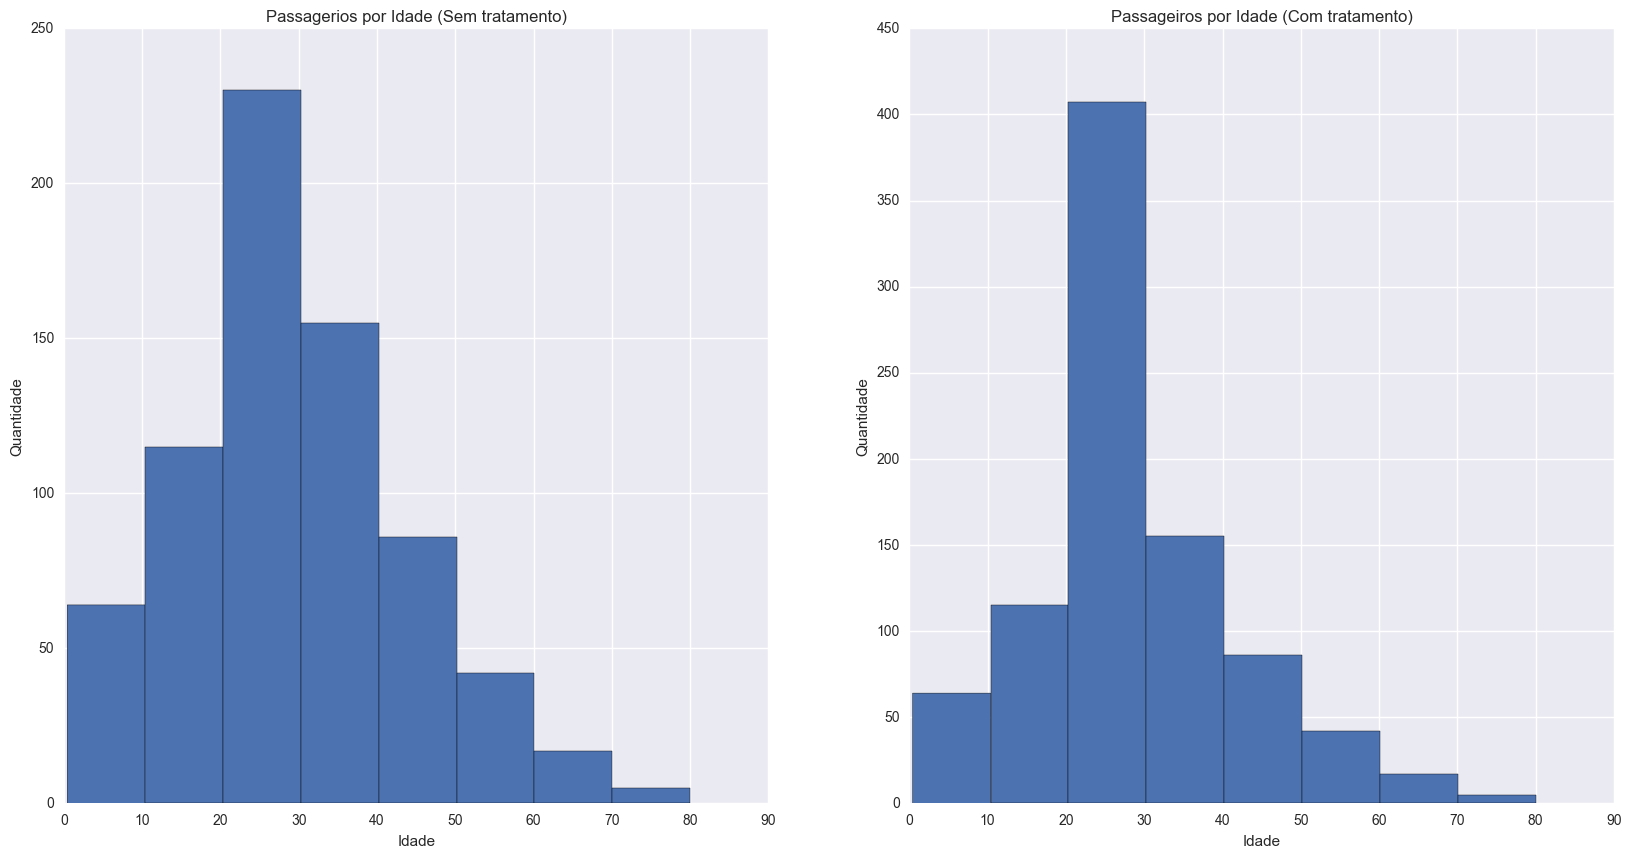

In [180]:
import matplotlib.pyplot as plt
import seaborn as sn

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axs[0].set_title('Passagerios por Idade (Sem tratamento)')
axs[0].set_xlabel('Idade')
axs[0].set_ylabel('Quantidade')
axs[1].set_title('Passageiros por Idade (Com tratamento)')
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Quantidade')

#plotando gráficos para entender o que muda na distribuição quando os valores NaN são substituídos pela média
titanic_df['Age'].dropna().hist(bins=8, ax=axs[0])
titanic_df['Age'].fillna(age_mean).hist(bins=8, ax=axs[1])

plt.show()

Como algumas idades não estão preenchidas nas amostras, tratamos esses casos adotando a média. Nos gráficos acima é possível visualizar a distribuição antes e depois do tratamento. A forma da distribuição pouco se altera, porém é possível notar um aumento no bin de 20 a 30 que é exatamente onde encontra-se a média.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


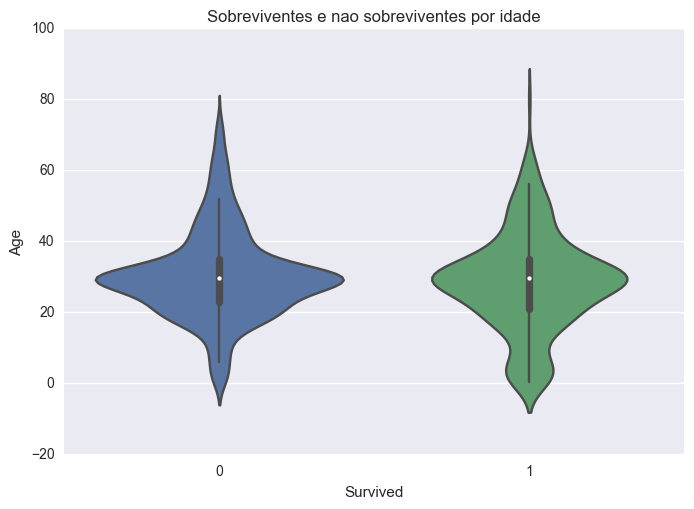

In [181]:
#Considerando a idade média para os casos null
titanic_df['Age'][np.isnan(titanic_df['Age'])] = age_mean

#plotando gráfico para comparar as idades dos sobreviventes e não sobreviventes 
ax = sn.violinplot(x="Survived",y="Age",data=titanic_df[['Survived','Age']])
plt.title("Sobreviventes e nao sobreviventes por idade")

plt.show()

No gráfico acima podemos analisar onde encontram-se a concentração dos sobreviventes e não sobreviventes por idade. Em ambos os casos (sobreviventes e não sobreviventes) a maior concentração está na idades próxima a 30 anos. Isso cria indícios que a idade teve puco relevância para sobreviver ou não. Pode ser também que a amostra coletada esteja com um grande concentração de pessoas com essa faixa de idade.

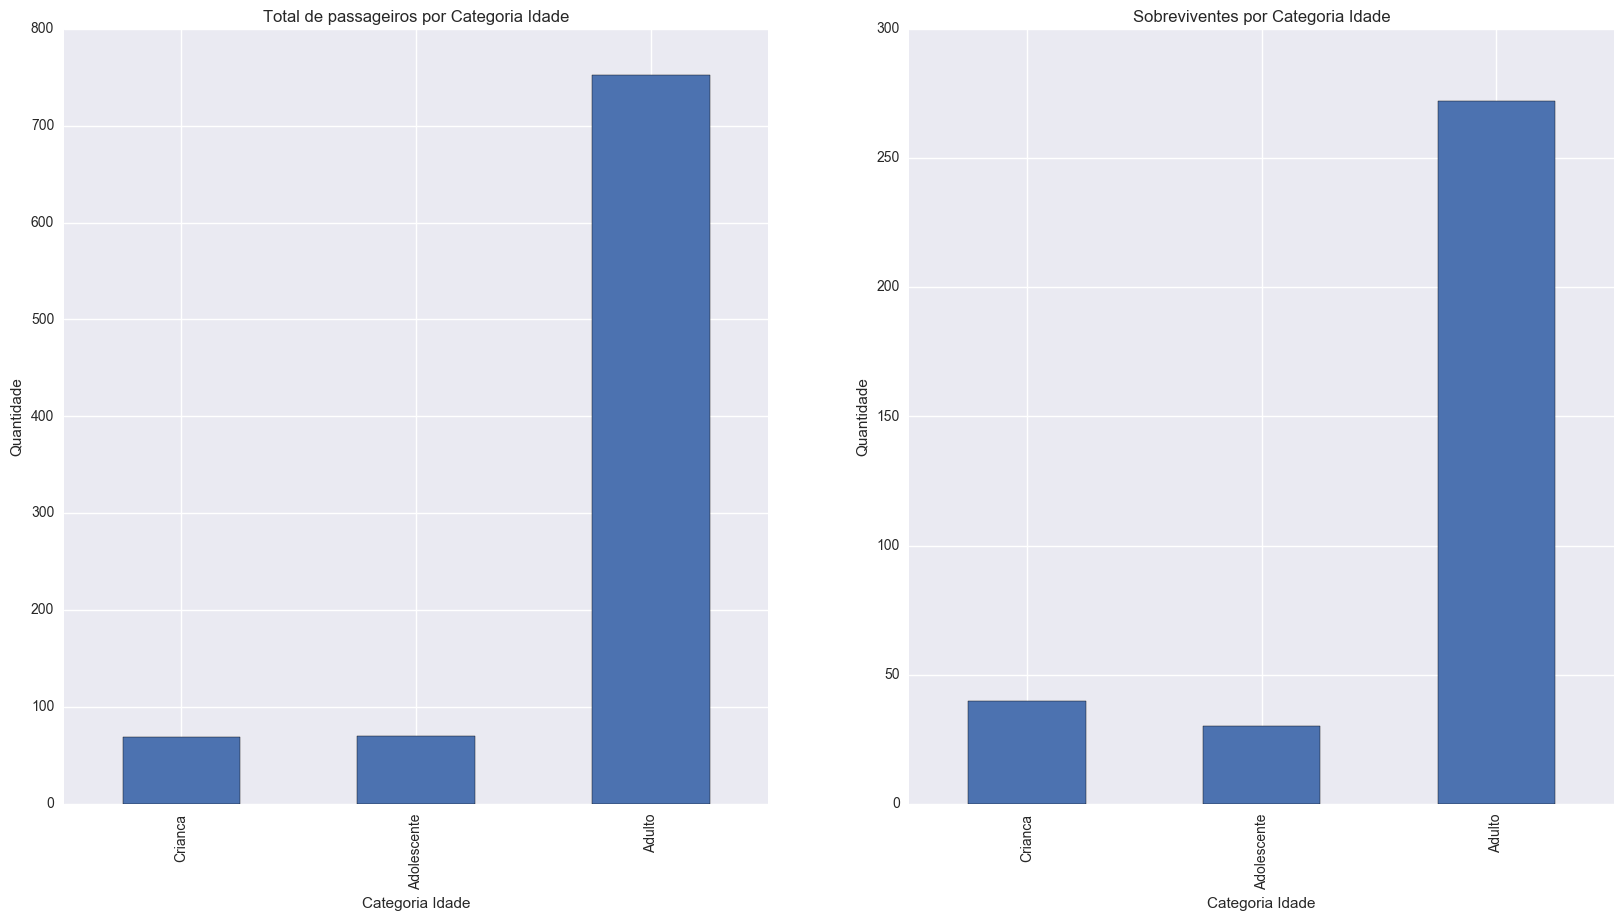

In [182]:
#Categorizando as idades por faixa etária
titanic_df['Categoria Idade'] = pd.cut(titanic_df['Age'], [0,12,18,200], labels=['Crianca', 'Adolescente', 'Adulto'])

def graph_analyse_survivals_variables_count (groupColumn):
    '''
    Função que dado uma variável de entrada, plota dois gráficos: 
     1. Total de passageiros presentes nos grupos da variável de entrada 
     2. Total de passageiros sobreviventes nos grupos da variável de entrada
     
     Args:
       param1(dataframe variable): variável do dataframe a ser analisada 
    '''
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    
    axs[0].set_title('Total de passageiros por ' + groupColumn)
    axs[1].set_title('Sobreviventes por ' + groupColumn)
    axs[0].set_ylabel("Quantidade")
    axs[1].set_ylabel("Quantidade")

    titanic_df[[groupColumn,'Survived']].groupby([groupColumn]).count().plot(kind='bar', ax=axs[0], legend=None)
    titanic_df[[groupColumn,'Survived']][titanic_df['Survived']==1].groupby([groupColumn]).count().plot(kind='bar', ax=axs[1], legend=None)
    
    plt.show()    

graph_analyse_survivals_variables_count('Categoria Idade')

Para elucidar melhor, categorizei as faixas de idade nos gráficos acima. Percebemos que o número de sobreviventes está quase que proporcional ao número de passageiros de cada uma das categorias. Para não restar dúvidas abaixo faço a proporção de cada uma das categorias.

In [183]:
# total de individuos por categoria de idade
print 'Total passageiros por categoria de idade \n', titanic_df['Categoria Idade'].value_counts()
print ''

# numero de sobreviventes por faixa etaria
print 'Total de sobrevivente por categoria de idade \n', titanic_df.groupby(['Categoria Idade','Survived']).size()
print ''

# percentual de sobreviventes
print 'Porcentagem de passageiros salvos e não salvos por categoria de idade \n', titanic_df.groupby(['Categoria Idade','Survived']).size()/titanic_df.groupby('Categoria Idade').size()*100


Total passageiros por categoria de idade 
Adulto         752
Adolescente     70
Crianca         69
Name: Categoria Idade, dtype: int64

Total de sobrevivente por categoria de idade 
Categoria Idade  Survived
Crianca          0            29
                 1            40
Adolescente      0            40
                 1            30
Adulto           0           480
                 1           272
dtype: int64

Porcentagem de passageiros salvos e não salvos por categoria de idade 
Categoria Idade  Survived
Crianca          0           42.028986
                 1           57.971014
Adolescente      0           57.142857
                 1           42.857143
Adulto           0           63.829787
                 1           36.170213
dtype: float64


De acordo com o comparativo acima as crianças foram as que tiveram a maior porcentagem de sobreviventes entre as crianças. Porém, não é uma diferença muita considerável.

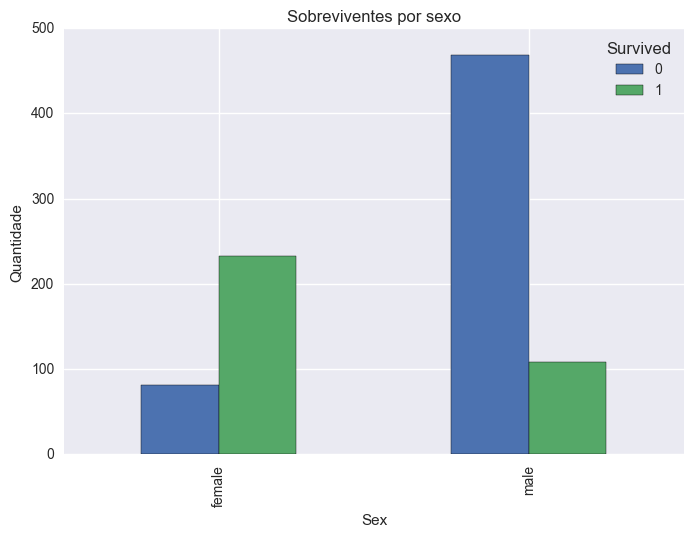

In [184]:
titanic_df.groupby(['Sex', 'Survived']).size().unstack().plot.bar(title="Sobreviventes por sexo")
plt.ylabel("Quantidade")

plt.show()

In [185]:
print 'Número total de mulheres: ', titanic_df['Sex'][titanic_df['Sex']=="female"].count()
print 'Número total de homens: ', titanic_df['Sex'][titanic_df['Sex']=="male"].count()

Número total de mulheres:  314
Número total de homens:  577


No gráfico acima identificamos que os homens compunham grande parte de amostra disponibilizada. Porém, mesmo com essa diferença as mulheres que tiveram o maior número de sobreviventes.

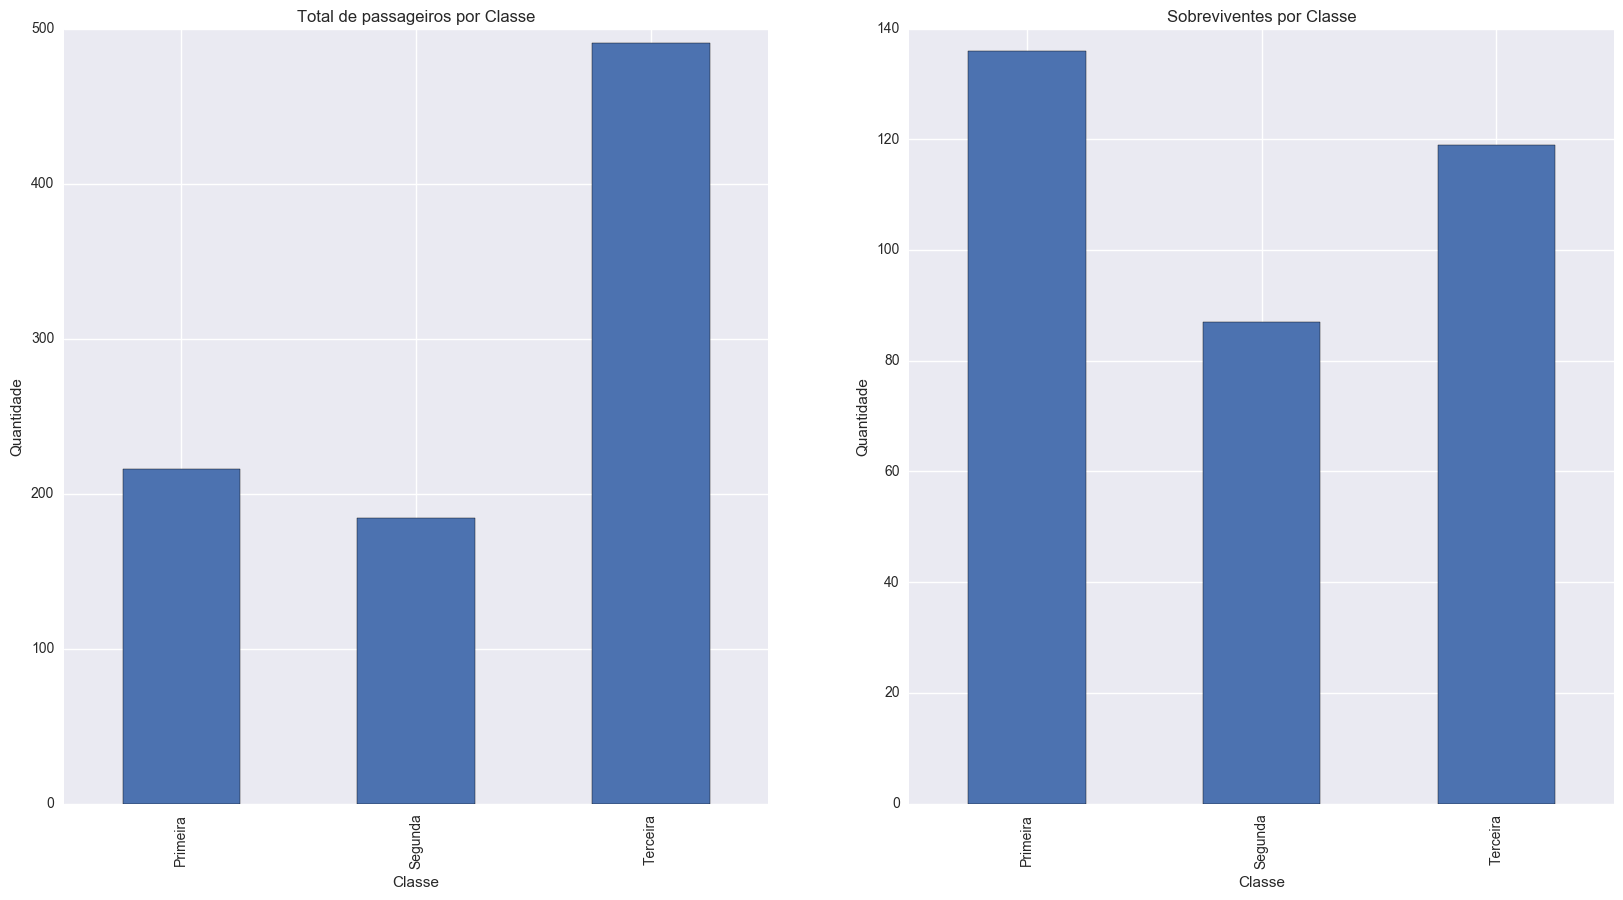

In [186]:
#Função para melhorar a descrição das classes
def classeDesc(classe):
    
    if classe == 1:
        descr = 'Primeira'
    elif classe == 2:
        descr = 'Segunda'
    elif classe == 3:
        descr = 'Terceira'
        
    return descr

titanic_df['Classe'] = titanic_df['Pclass'].apply(classeDesc)

graph_analyse_survivals_variables_count('Classe')

In [187]:
# percentual de sobreviventes por classe
print 'Porcentagem de passageiros salvos e não salvos por classe \n', titanic_df.groupby(['Classe','Survived']).size()/titanic_df.groupby('Classe').size()*100

Porcentagem de passageiros salvos e não salvos por classe 
Classe    Survived
Primeira  0           37.037037
          1           62.962963
Segunda   0           52.717391
          1           47.282609
Terceira  0           75.763747
          1           24.236253
dtype: float64


Olhando para a variável que definia a classe que o passageiro pertencia, no gráfico notamos que proporcionalmente ao número de passageiros de cada classe da amostra, a primeira e a segunda classe tiveram mais sobrevientes do que a terceira. Sendo que a primeira classe em uma proporção bem maior.

In [188]:
#verificar de onde partiiram o maior número de passageiros e adotar para os missings
titanic_df[['Embarked','PassengerId']].groupby(['Embarked']).count()

,PassengerId
Embarked,
C,168
Q,77
S,644


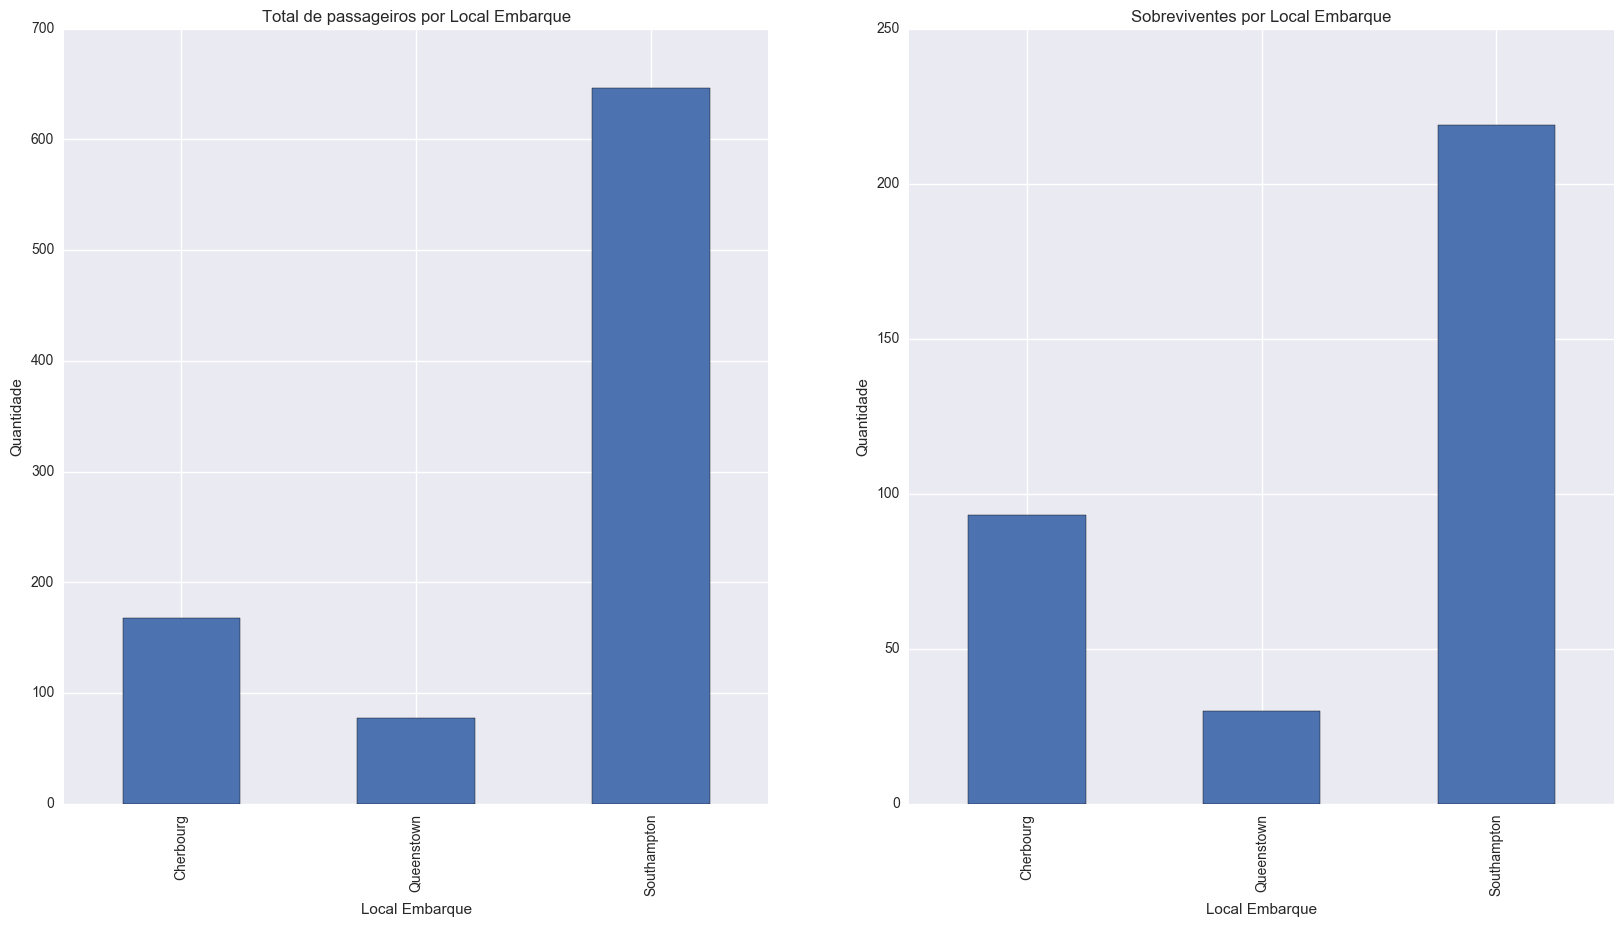

In [189]:
#Função para tratar os locais de embarque para a descrição ficar mais clara
def embarqueDesc(local):
    
    if local == 'C':
        descr = 'Cherbourg'
    elif local == 'Q':
        descr = 'Queenstown'
    elif local == 'S':
        descr = 'Southampton'
        
    return descr


titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df['Local Embarque'] = titanic_df['Embarked'].apply(embarqueDesc)

graph_analyse_survivals_variables_count('Local Embarque')

In [190]:
# percentual de sobreviventes por local de embarque
print 'Porcentagem de passageiros salvos e não salvos por local de embarque \n', titanic_df.groupby(['Local Embarque','Survived']).size()/titanic_df.groupby('Local Embarque').size()*100

Porcentagem de passageiros salvos e não salvos por local de embarque 
Local Embarque  Survived
Cherbourg       0           44.642857
                1           55.357143
Queenstown      0           61.038961
                1           38.961039
Southampton     0           66.099071
                1           33.900929
dtype: float64


No gráfico acima vemos o local de embarque. O local de embarque não parece ter muita relevância para a sobrevivência do passageiro. O gráfico de sobreviventes se mantém proporcional ao número total de passageiros que embarcaram em cada um dos portos.

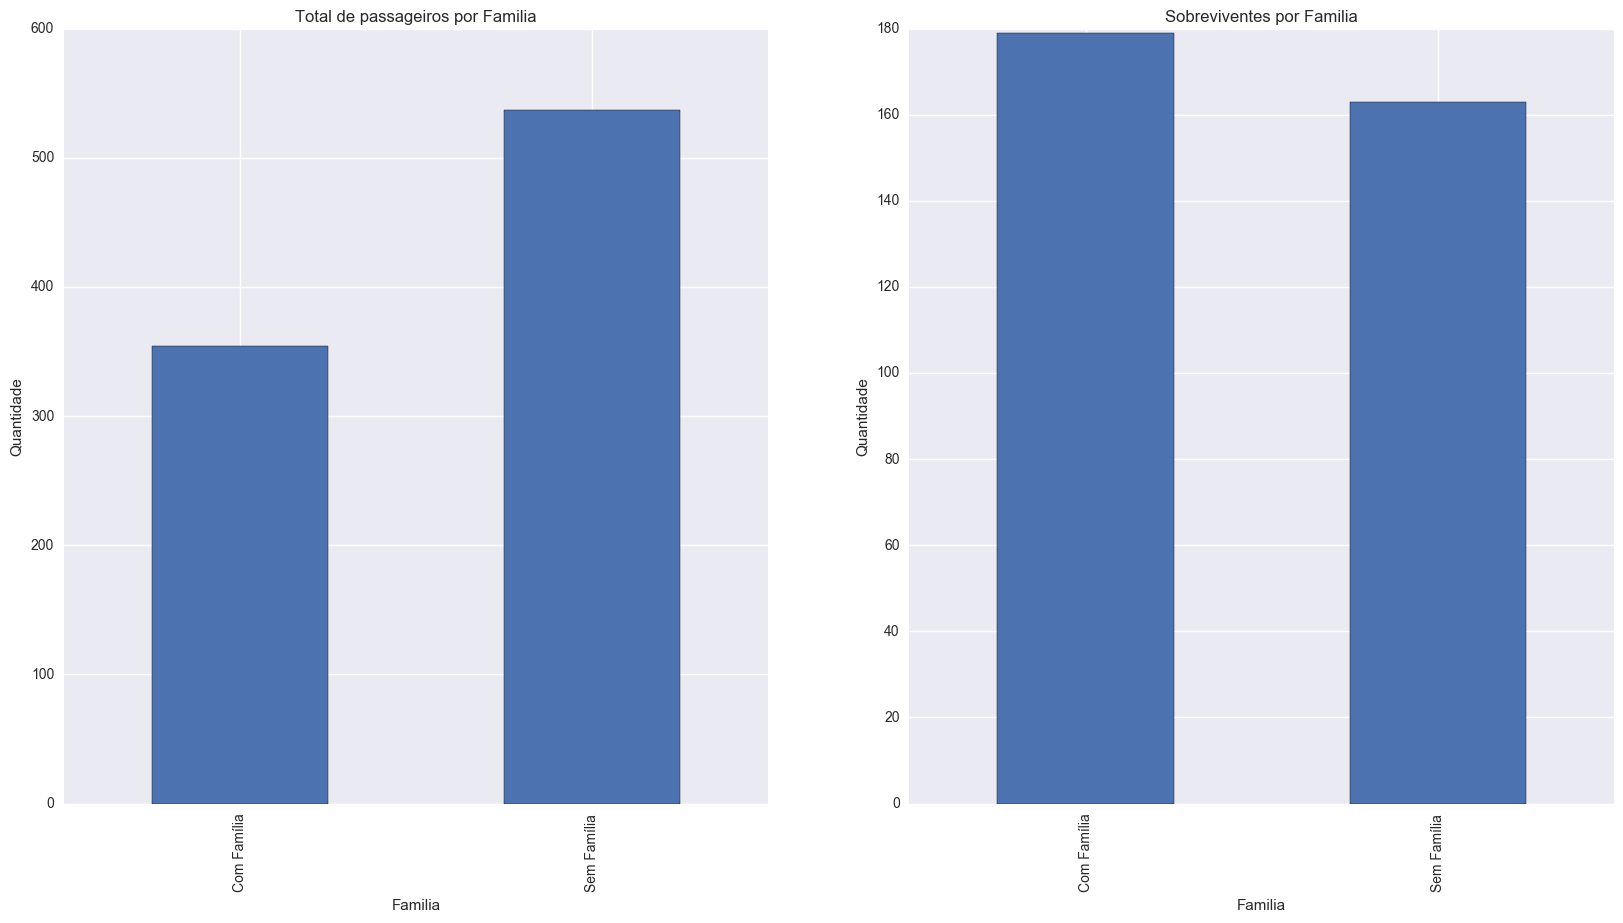

In [191]:
#Função para tratar de forma descritiva os passageiros que viajam com familiares ou sozinhos
def familiaDesc(fami):
    
    if fami > 0:
        descr = 'Com Família'
    else:
        descr = 'Sem Família'
    return descr

titanic_df['Familia'] = (titanic_df['SibSp'] + titanic_df['Parch']).apply(familiaDesc)

graph_analyse_survivals_variables_count('Familia')

In [192]:
# percentual de sobreviventes por estarem com família
print 'Porcentagem de passageiros salvos e não salvos por estarem com a família \n', titanic_df.groupby(['Familia','Survived']).size()/titanic_df.groupby('Familia').size()*100

Porcentagem de passageiros salvos e não salvos por estarem com a família 
Familia      Survived
Com Família  0           49.435028
             1           50.564972
Sem Família  0           69.646182
             1           30.353818
dtype: float64


No gráfico acima temos uma comparação daqueles que viajam com alguém da família comparados aos que viajavam sozinhos. Os que viajavam com alguém da família eram minoria no total de passageiros, porém entre os sobreviventes foram maiores.

In [193]:
def correlation(x, y):

    '''
    Função para computar a correlação entre duas vaeriáveis.
    Correlação = média de x (em unidades de desvio padrão) * y (em unidades de desvio padrão). 
    Quanto mais próximo de 1.0, maior é o grau de correlação.
    
    Args:
      x -> variável do dataframe 
      y -> variável do dataframe
    
    
    Returns:
      float: grau de correlação 
    
    '''
    
    x_std = x.std(ddof=0)
    x_mean = x.mean()
    
    dif_x = x - x_mean
    standard_x = dif_x / x_std
    
    y_std = y.std(ddof=0)
    y_mean = y.mean()
    
    dif_y = y - y_mean
    standard_y = dif_y / y_std
    
    return (standard_x * standard_y).mean()

In [194]:
#transformando variáveis categóricas em números para fazer a correlação
titanic_df_number = pd.get_dummies(titanic_df, columns=['Familia'])
print "Correlação sobreviventes com família", correlation(titanic_df['Survived'],titanic_df_number['Familia_Com Família'])

titanic_df_number = pd.get_dummies(titanic_df, columns=['Sex'])
print "Correlação sobreviventes sexo feminino", correlation(titanic_df['Survived'],titanic_df_number['Sex_female'])

titanic_df_number = pd.get_dummies(titanic_df, columns=['Embarked'])
print "Correlação sobreviventes Embarque Southampton", correlation(titanic_df['Survived'],titanic_df_number['Embarked_S'])

titanic_df_number = pd.get_dummies(titanic_df, columns=['Classe'])
print "Correlação sobreviventes primeira classe", correlation(titanic_df['Survived'],titanic_df_number['Classe_Primeira'])

titanic_df_number = pd.get_dummies(titanic_df, columns=['Categoria Idade'])
print "Correlação sobreviventes criança", correlation(titanic_df['Survived'],titanic_df_number['Categoria Idade_Crianca'])

Correlação sobreviventes com família 0.2033670857
Correlação sobreviventes sexo feminino 0.543351380658
Correlação sobreviventes Embarque Southampton -0.149682723271
Correlação sobreviventes primeira classe 0.285903767784
Correlação sobreviventes criança 0.116691425036


Acima faço um teste de correlação para comparar com o estudado nos gráficos acima. A correlação mais forte acontece com a variável sexo, em que as mulheres mostram uma correlação maior com a variável sobrevivente. Assim como foi demonstrado nos gráficos acima.

# Conclusão

Respondendo as perguntas que foram levantadas no início da análise, com base na exploração feita conclui-se que os maiores fatores de influência para a sobrevivivência de um passageiro foram em ordem de importância: o sexo (as mulheres foram as que mais sobreviveram), a classe (passageiros da primeira e segunda classe tiveram mais chances) e por último os que viajavam com familiares. A idade e local de embarque tiveram pouca influência sobre os passageiros que sobreviveram. 

Pontos de atenção:
-> Deve-se levar em consideração que o dataset analisado é de uma amostra e não abrange a completude dos passageiros, o que pode levar a considerações incorretas.
-> Nenhum teste estatístico foi aplicado para certificar-se que as análises descritivas demonstradas acima não são mero acaso.
-> Podem existir variáveis não contempladas no dataset que mudariam o cenários das análises, como por exemplo o local em que passageiro estava no momento do naufrágio.

Trabalhos futuros:
Esse seria bom exemplo de dataset para geração de um modelo preditivo, dados as características de um passageiro dizer se ele teria mais chances de sobreviver ou não.